# Install Required Libraries

In [36]:
from keras.datasets import mnist
from keras.utils.np_utils import to_categorical
from keras.models import load_model
import numpy as np
import matplotlib.pyplot as plt

# Dataset Loading

In [3]:
(X_train,y_train), (X_test, y_test) = mnist.load_data()

In [8]:
X_train.shape, X_test.shape

((60000, 28, 28), (10000, 28, 28))

In [16]:
n_sampel_train = X_train.shape[0]
n_sampel_test = X_test.shape[0]

In [11]:
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

**Analysis** <br>
1. Ada 60.000 data training dan 10.000 data uji dengan ukuran 28x28 piksel
2. Ada 9 label pada kelas target yaitu dari label angk 0 sampai 9
3. Ukuran dimensi dataset MNIST cukup kecil, yaitu 28x28. Dataset di dunia nyata mungkin saja tidak serapi ini dan perlu dilakukan preprocessing

# Explore Data
***
Plotting one data from array to image

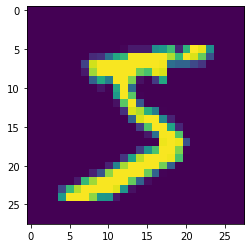

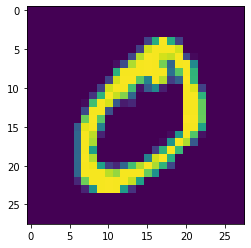

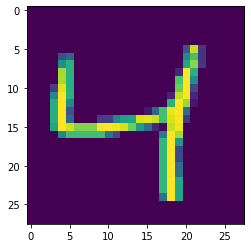

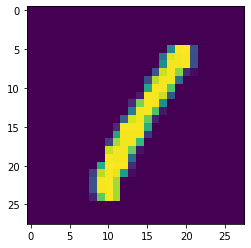

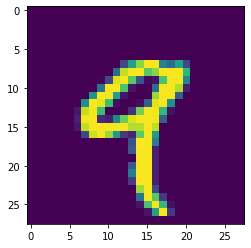

In [15]:
for i in range(5):
    plt.imshow(X_train[i])
    plt.show()

# Data Preprocessing

## Convert image to grayscale

In [17]:
to_gray_scale = 1
X_train = X_train.reshape(n_sampel_train, 28, 28, to_gray_scale)
X_test = X_test.reshape(n_sampel_test, 28, 28, to_gray_scale)

## One Hot Encoding Target Variable

In [22]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [26]:
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

Label dari y_train[0] --> 5, jadi array OHE nya akan aktif di index ke 6

# Modelling

In [27]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten

In [29]:
# create model
model = Sequential()

In [32]:
# add model layers
model.add(
    Conv2D(64, kernel_size=3, activation='relu', input_shape=(28,28,1))
)
model.add(
    Conv2D(32, kernel_size=3, activation='relu')
)
model.add(Flatten())
model.add(
    Dense(10, activation='softmax')
)

**Analysis** <br>
1. **Sequential** memungkinkan membangun model layer per layer
2. **add()** adalah fungsi yang digunakan untuk menambahkan layer ke model
3. **Conv2D** adalah layer yang digunakan untuk menerima input image dan memperlakukan sebagai matriks 2 dimensi
- *64* dan *32* adalah jumlah node di setiap layer. Jumlah ini bisa diubah-ubah bergantung dari dataset yang digunakan
4. **Kernel Size** adalah *filter matrix* dari convolution. Kernel bernilai *3* artinya filter matrix yang digunakan adalah 3x3. X_train[0] memiliki ukuran (60000, 28, 28)
5. **Activation** adalah fungsi aktivasi untuk setiap layer. *ReLU* terbukti sebagai fungsi aktivasi yang cukup andal di neural networks
6. **Input shape** dimensi dari data input yang diterima. X_train telah direshape untuk menjadi grayscale sebelumnya, yaitu dengan ukuran menjadi (28,28,1)
7. **Flatten** adalah suatu lapisan yang menghubungkan *Conv2D* dengan *Dense Layer*
8. **Dense** adalah lapisan output dari neural networks. Nilai 10 pada Dense menunjuk jumlah label kelas yang berjumlah 10 dari (0-9)
- *Softmax* pada lapisan output menghasilkan luaran berupa probabilitas. Semakin besar probabilitas pada suatu node di lapisan output, maka label tersebut yang akan menjadi pemenang

## Meng*compile* model CNN
***
Dalam melakukan *compile* ada tiga parameter yang digunakan: **optimizer, loss, metrics** <br>
1. **Optimizer** mengkontrol perubahan nilai dari learning rate dalam fase training
2. **categorical_crossentropy** digunakan untuk menghitung loss function
3. **Accuracy** digunakan sebagai matriks ukuran performa model

In [33]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

## Train model

In [34]:
model.fit(x=X_train, y=y_train, validation_data=(X_test,y_test), epochs=3)

Epoch 1/3
1875/1875 [==============================] - 105s 56ms/step - loss: 0.2646 - accuracy: 0.9482 - val_loss: 0.0967 - val_accuracy: 0.9709
Epoch 2/3
1875/1875 [==============================] - 124s 66ms/step - loss: 0.0699 - accuracy: 0.9781 - val_loss: 0.0883 - val_accuracy: 0.9736
Epoch 3/3
1875/1875 [==============================] - 164s 87ms/step - loss: 0.0472 - accuracy: 0.9858 - val_loss: 0.0789 - val_accuracy: 0.9777


## Save Model

In [35]:
model.save('models/model_trained.h5')

# Model Inference

In [37]:
# load model
model = load_model('models/model_trained.h5')

In [43]:
for predict in model.predict(X_test[:4]):
    print("Predicted Label = ",np.argmax(predict))

Predicted Label =  7
Predicted Label =  2
Predicted Label =  1
Predicted Label =  0


In [46]:
for true_label in y_test[:4]:
    print("True Label = ", np.argmax(true_label))

True Label =  7
True Label =  2
True Label =  1
True Label =  0
